<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **1.1** Connect to Google Drive


* Initiate the connection with Google Drive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

* Specify the Google Drive file ID

In [ ]:
file_id = '1GLyhPRITeg1LnCC9PCQnuapKj49qH8hj'
downloaded = drive.CreateFile({'id': file_id})

downloaded.GetContentFile('tweet_data.csv')

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **1.2** Load and analyze Dataset

In [ ]:
import pandas as pd
import numpy as np

* Read Dataframe stored in Google Drive under `.csv` format

In [ ]:
df = pd.read_csv("tweet_data.csv")

* Use the `sample` method to look at some random tweets present in our dataset

In [ ]:
df .head(10)

,textID,tweet_text,sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative
1,1956967696,Funeral ceremony...gloomy friday...,negative
2,1956967789,wants to hang out with friends SOON!,positive
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative
5,1956969035,@charviray Charlene my love. I miss you,negative
6,1956969172,@kelcouch I'm sorry at least it's Friday?,negative
7,1956969531,Choked on her retainers,negative
8,1956970047,Ugh! I have to beat this stupid song to get to...,negative
9,1956970424,@BrodyJenner if u watch the hills in london u ...,negative


* Check how many tweets there are in total

In [ ]:
print("Number of tweets: {}".format(len(df)))

Number of tweets: 18727


* Print a tweet and its sentiment based on a tweet ID

In [ ]:
tweet_id=143
tweet = df.iloc[tweet_id]


In [ ]:
print("Tweet: {}".format( tweet["tweet_text"]))
print("Tweet sentiment: {}".format(tweet["sentiment"]))

Tweet: think i may have broke a toe at the bar tonight......thanks drunk girl for steppin all over me!!!!!
Tweet sentiment: negative


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **1.3** Dataset Visualization

In [ ]:
import matplotlib.pyplot as plt

* `pyplot` helps understanding and representing how tweets are distributed over the dataset

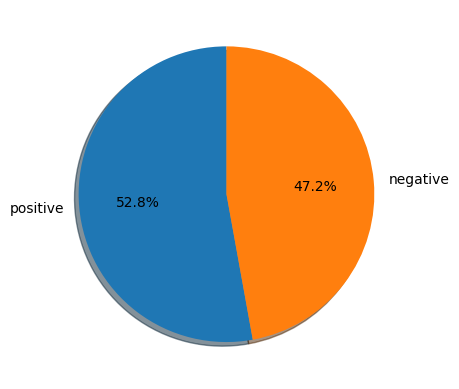

In [ ]:
sentiment_count = df["sentiment"]. value_counts()
plt.pie(sentiment_count ,labels=sentiment_count.index,
        autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* Print the count of positive and negative tweets

In [ ]:
print("Number of + tweets: {}".format(df[df["sentiment"]=="positive"].count()[0]))

print("Number of - tweets: {}".format(df[df["sentiment"]=="negative"].count()[0]))

Number of + tweets: 9897
Number of - tweets: 8830


<img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> Wordclouds

* The `Wordclouds` package is very useful to get a quick overview of most recurrent words in the text corpus

In [ ]:
from wordcloud import WordCloud

* What are the words most often present in positive tweets?

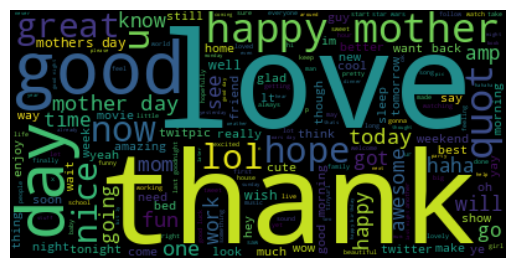

In [ ]:

# Assuming you have already loaded the DataFrame 'df' from your CSV file

# Filter positive tweets
pos_tweets = df[df["sentiment"] == "positive"]

# Combine all positive tweet text into a single string
txt = " ".join(tweet.lower() for tweet in pos_tweets["tweet_text"])

# Generate the word cloud
wordcloud = WordCloud().generate(txt)

# Display the word cloud
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


* ... and in negative tweets?

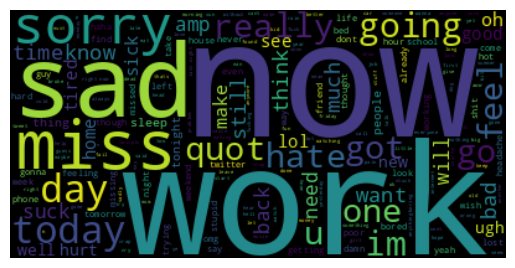

In [ ]:

neg_tweets = df[df["sentiment"] == "negative"]

# Combine all positive tweet text into a single string
txt = " ".join(tweet.lower() for tweet in neg_tweets["tweet_text"])

# Generate the word cloud
wordcloud = WordCloud().generate(txt)

# Display the word cloud
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **Normalization uisng NLTK**

* Long and complex tweet to be processed

In [ ]:
complex_tweet = r"""RT @AIOutsider : he looooook,
THis is a big and complex TWeet!!! 👍 ...
We'd be glad if you couldn't normalize it!
Check https://t.co/7777 and LET ME KNOW!!! #NLP #Fun"""

* Create a custom `process_tweet` function that can be used to process tweets end-to-end


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def process_tweet(tweet):
    # Convert to lowercase
    normalized_tweet = tweet.lower()

    # Remove Retweets and User Tags
    retweet_user_removed = re.sub(r'rt @\w+', '', normalized_tweet)
    retweet_user_removed = re.sub(r'@\w+', '', retweet_user_removed)

    # Remove URLs
    url_removed = re.sub(r'http\S+', '', retweet_user_removed)

    # Remove Hashtags
    hashtag_removed = re.sub(r'#\w+', '', url_removed)

    # Remove Punctuation (except for word repetition handling)
    punctuation_removed = re.sub(r'[^\w\s]+', '', hashtag_removed)

    # Remove Word Repetition (e.g., "looooook" becomes "look")
    repetition_removed = re.sub(r'(\w)(\1+)', r'\1', punctuation_removed)

    # Tokenization
    tokens = word_tokenize(repetition_removed)

    # Remove Stopwords and Lemmatization
    lemmatizer = WordNetLemmatizer()
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stopwords.words('english')]

    processed_text = ' '.join(filtered_tokens)
    return processed_text




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


* Testing  `process_tweet` function!




In [ ]:
processed_tweet = process_tweet(complex_tweet)
print("Processed Tweet:")
print(processed_tweet)

Processed Tweet:
lok big complex twet wed glad couldnt normalize check let know


*  some more examples!


In [ ]:
import random

In [ ]:

# Process and print examples
num_examples = 5  # Number of examples to process and print
for i in range(num_examples):
    tweet_id = random.randint(0, len(df) - 1)
    tweet = df.iloc[tweet_id]["tweet_text"]  # Replace 'tweet_column_name'
    processed_tweet = process_tweet(tweet)
    print(f"Example {i + 1}:\nOriginal Tweet: {tweet}\nProcessed Tweet: {processed_tweet}\n")


Example 1:
Original Tweet: is watching big brothes big quiz    ,       rather tiredd    , but downloading a dvd so have to wait till finished till i can go to bed
Processed Tweet: watching big brothes big quiz rather tired downloading dvd wait til finished til go bed

Example 2:
Original Tweet: I miss my dog  r.i.p.Batman... Yeah, Batman (I really hope 'all dogs go to heaven' is true)
Processed Tweet: mi dog ripbatman yeah batman realy hope al dog go heaven true

Example 3:
Original Tweet: Not smoking sucks sucks FUCKING SUCKS, I want a cig
Processed Tweet: smoking suck suck fucking suck want cig

Example 4:
Original Tweet: maybe i should take up drinking again, feel as if i have a ,massive hangover  still not ,yself today
Processed Tweet: maybe take drinking fel masive hangover stil yself today

Example 5:
Original Tweet: @BeckyBuckwild Omg Beckky i love you! you should've won the 250G's  i was rootin for you.. hows things going?
Processed Tweet: omg becky love shouldve 250gs rotin ho

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# * Text **Representation** </h2>

In [ ]:
pip install -U scikit-learn

* Convert sentiment to 1 for "positive" and 0 for "negative" sentiment

In [ ]:
df["tokens"] = df["tweet_text"].apply(process_tweet)
df["tweet_sentiment"]= df["sentiment"].apply(lambda i: 1
                                             if i== "positive"else 0)
df.head (10)

,textID,tweet_text,sentiment,tokens,tweet_sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative,layin n bed headache ughwaitin cal,0
1,1956967696,Funeral ceremony...gloomy friday...,negative,funeral ceremonyglomy friday,0
2,1956967789,wants to hang out with friends SOON!,positive,want hang friend son,1
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative,repinging didnt go prom bc bf didnt like friend,0
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative,hm,0
5,1956969035,@charviray Charlene my love. I miss you,negative,charlene love mi,0
6,1956969172,@kelcouch I'm sorry at least it's Friday?,negative,im sory least friday,0
7,1956969531,Choked on her retainers,negative,choked retainer,0
8,1956970047,Ugh! I have to beat this stupid song to get to...,negative,ugh beat stupid song get next rude,0
9,1956970424,@BrodyJenner if u watch the hills in london u ...,negative,u watch hils london u wil realise tourture wek...,0


In [ ]:
X = df["tokens"].tolist()
Y = df["tweet_sentiment"].tolist()

In [ ]:
print(X)
print(Y)


['layin n bed headache ughwaitin cal', 'funeral ceremonyglomy friday', 'want hang friend son', 'repinging didnt go prom bc bf didnt like friend', 'hm', 'charlene love mi', 'im sory least friday', 'choked retainer', 'ugh beat stupid song get next rude', 'u watch hils london u wil realise tourture weks weks late watch itonlinelol', 'slepy even late fail', 'lady gaga tweted impresed video leaking know', 'convinced always wanted signal give ofdamn think lost another friend', 'way home n 2 deal w underage girl drinking gin da bus talking bout kegersdamn fel old', 'im sory people rude isac get maners know beter lewd', 'dam server stil ned hit 80 al koxpers pa', 'fudge bsd whole paper tired ugh hate schol time slep', 'hate cancer hate hate hate', 'anoying start typing computer midle night', 'cant slep', 'mised bly bus', 'yeah fel al funy cause havent slept enough woke mum cause singing shes impresed', 'much beter day far stil quite early last day', 'lt3 gona first twiter cause amazing lol com

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **3.2** Positive/Negative Frequency

* Corpus of tweet tokens used for the first method

In [ ]:
corpus = [["i", "love", "nlp"],
          ["i", "miss", "you"],
          ["i", "love", "you"],
          ["you", "are", "happy", "to", "learn"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

sentiment = [1, 0, 1, 1, 0, 0]


* Create a `build_freqs` function used to build a dictionnary with the word and sentiment as index and the count of occurence as value


<table style="width:100%">
  <tr>
    <th>Word</th>
    <th>Positive</th>
    <th>Negative</th>
  </tr>
  <tr>
    <td>love</td>
    <td>dict[(love, 1)]</td>
    <td>dict[(love, 0)]</td>
  </tr>
  <tr>
    <td>lost</td>
    <td>dict[(lost, 1)]</td>
    <td>dict[(lost, 0)]</td>
  </tr>
  <tr>
    <td>happy</td>
    <td>dict[(happy, 1)]</td>
    <td>dict[(happy, 0)]</td>
  </tr>
</table>


In [ ]:
def build_freqs(tweet_list, sentiment_list):
  freqs = {}
  for tweet, sentiment in zip(tweet_list, sentiment_list):
    for word in tweet:
      pair = (word, sentiment)
      if pair in freqs:
        freqs[pair] += 1
      else:
        freqs[pair] = 1
  return freqs

* Build the frequency dictionnary on the corpus by using the function

In [ ]:
freqs = build_freqs(corpus, sentiment)

In [ ]:
print(freqs)

{('i', 1): 2, ('love', 1): 2, ('nlp', 1): 1, ('i', 0): 3, ('miss', 0): 1, ('you', 0): 1, ('you', 1): 2, ('are', 1): 1, ('happy', 1): 1, ('to', 1): 1, ('learn', 1): 1, ('lost', 0): 1, ('my', 0): 1, ('computer', 0): 1, ('am', 0): 1, ('so', 0): 1, ('sad', 0): 1}


* Build the frequency dictionnary on the entire dataset by using the function

> Indented block



In [ ]:
freqs_all = build_freqs(X, Y)

In [ ]:
word = "hate"
sentiment = 1

if (word, sentiment) in freqs_all:
    print("Frequency of word '{}' in + tweets: {}".format(word, freqs_all[(word, sentiment)]))
else:
    print("Word '{}' with sentiment {} not found in the dictionary.".format(word, sentiment))


Word 'hate' with sentiment 1 not found in the dictionary.


* Create a `tweet_to_freqs` function used to convert tweets to a 2-d array by using the frequency dictionnary

In [ ]:
def tweet_to_freq(tweet, freqs):
  x = np.zeros((2,))
  for word in tweet:
    if (word, 1) in freqs:
      x[0] += freqs[(word, 1)]
    if (word, 0) in freqs:
      x[1] += freqs[(word, 0)]
  return x

* Print the 2-d vector by using the `tweet_to_freqs` function and the *corpus* dictionnary

In [ ]:
print(tweet_to_freq(["i", "love", "nlp"], freqs))

[5. 3.]


* Print the 2-d vector by using the `tweet_to_freqs` function and the *dataset* dictionnary

In [ ]:
print(tweet_to_freq(["i", "love", "nlp"], freqs_all))

[23629. 23505.]


* Plot word vectors in a chart and see where they locate

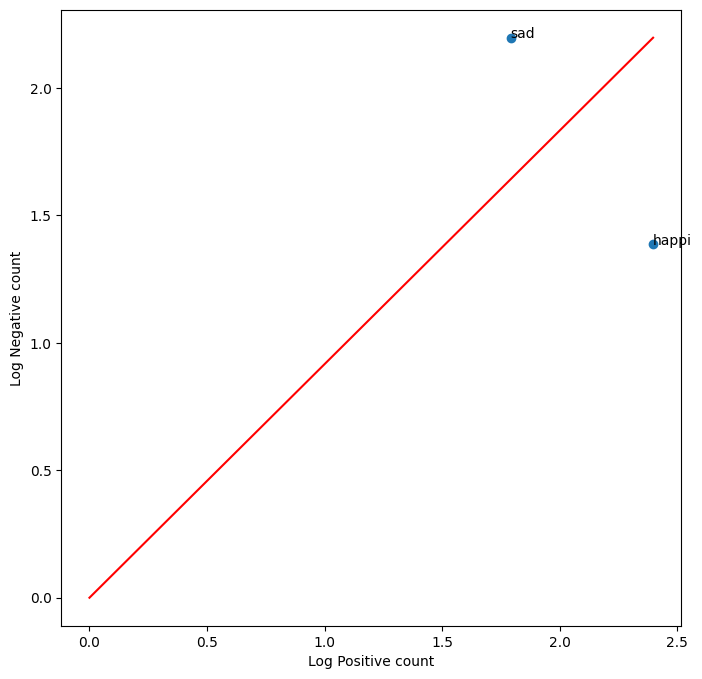

In [ ]:

fig, ax = plt.subplots(figsize=(8, 8))

word1 = "happi"
word2 = "sad"

def word_features(word, freqs):
    x = np.zeros((2,))
    if (word, 1) in freqs:
        x[0] = np.log(freqs[(word, 1)] + 1)
    if (word, 0) in freqs:
        x[1] = np.log(freqs[(word, 0)] + 1)
    return x

x_axis = [word_features(word, freqs_all)[0] for word in [word1, word2]]
y_axis = [word_features(word, freqs_all)[1] for word in [word1, word2]]

ax.scatter(x_axis, y_axis)

plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

ax.plot([0, max(x_axis)], [0, max(y_axis)], color='red')  # Changed the plot limits
plt.text(x_axis[0], y_axis[0], word1)
plt.text(x_axis[1], y_axis[1], word2)
plt.show()


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **3.3** Bag of Word

* Corpus of tweet tokens used for the second method

In [ ]:
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

* Import `CountVectorizer` from the Scikit-learn Library

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

* Create a `fit_cv` function used to build the Bag-of-Words vectorizer with the corpus

In [ ]:
def fit_cv(tweet_corpus):
  cv_vect = CountVectorizer(tokenizer=lambda x: x,
                            preprocessor=lambda x: x)
  cv_vect.fit(tweet_corpus)
  return cv_vect

* Use the `fit_cv` function to fit the vectorizer on the corpus

In [ ]:
cv_vect = fit_cv(corpus)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  )


* Get the vectorizer features (matrix columns)

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **3.4** Term Frequency – Inverse Document Frequency (TF-IDF)

* Corpus of tweet tokens used for the third method

In [ ]:
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]